In [3]:
%matplotlib inline
import matplotlib as mpl
#mpl.use('Agg')
import numpy as np
import pylab as py
#import Extract_ncfile_save_fluxes_radiation
#import Reload_save_interpolated as svintp
import matplotlib.cm as cm
from reverse_cmap import rcmap
import sys
import os
import errno
import netCDF4 as nc

BuRd = rcmap(cm.RdBu)

import hickle as hkl

#source_dirc=svintp.source
#exp_dirc=["aqua_2m/","aqua_20m/","land_rec20m/"]

## A function to save a dictionary ##
def save(filename,dictionary):
    hkl.dump(dictionary, filename, mode='w')

## A function to load a dictionary ## 
def load(filename):
    dictionary = hkl.load(filename)
    return dictionary

def make_sure_path_exists(path):
    try:
        os.makedirs(path)
    except OSError as exception:
        if exception.errno != errno.EEXIST:
            raise

# dirc=sys.argv

####################
#### smoothening ###
####################

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#source='/project2/tas1/pragallva/Fall_quarter_2017/post_process_data/land_realtest/'
source_dir='/project2/tas1/pragallva/Spring_quarter/post_process_data/'
source = source_dir+'aqua_2m/'
            
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/")
make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/")

fig_dest="/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/"

a=6371.0e3
R=a

/home/pragallva/Project1/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import numpy as np
np.arange(-87.0,87.1,0.1).astype(np.float64)

array([-87. , -86.9, -86.8, ...,  86.8,  86.9,  87. ])

In [4]:
import glob
import numpy as np
import scipy.io as sio
import pylab as py
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy import stats

#### Invoke all the files

m5=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca5m/*.hkl'))
m10=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca10m/*.hkl'))
m50=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca50m/*.hkl'))
m100=(glob.glob('/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/*.hkl'))

In [5]:
m100

['/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/temp_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/flux_interp_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/raw_data_dict.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/coord_dic.hkl',
 '/project2/tas1/pragallva/Spring_quarter_2018/post_process_data/aqua_isca100m/div_flux_dict.hkl']

In [6]:
t=0;f=1;r=2;c=3;d=4;

DEPTHS=[m5,m10,m50,m100]
flux=[]
div=[]
temp=[]
raw=[]
coord=load(m5[3])
for depth in DEPTHS:
    flux.append(load(depth[f]))
    div.append(load(depth[d])) 
    temp.append(load(depth[t]))
    raw.append(load(depth[r]))

In [7]:
raw[0].keys()

['Z', 'q', 'U', 'T', 'V', 'MSE', 'latn']

In [8]:
import scipy.io as sio

In [9]:
d5=0;d10=1;d50=2;d100=3

In [10]:
coord.keys()

['plev', 'lon', 'p_sfc', 'no_of_plevels', 'time', 'lat']

In [11]:
# def save(X,name): 
#     Y={'d5':X[d5], 'd10':X[d10],'d50':X[d50], 'd100':X[d100]}
#     sio.savemat(name, Y)
# dest= '/project2/tas1/pragallva/Spring_quarter_2018/MAT_files/'  
# save(flux,dest+"FLUX_in_PW.mat")
# save(div, dest+"DIV_in_W_m2.mat")
# save(raw, dest+"RAW_data_all_levels.mat")
# sio.savemat(dest+"coordinates.mat", coord)

In [12]:
lat=div[0]['latn']
def M(X):
    #X=X-X.mean(axis=0)[None,:]
    return X
Iswabs=[]; Ishf=[]; Idhdt=[]; Iolr=[]; Ine=[];
ISW_sfc=[]; ISW_toa=[]; ILW_sfc=[]; Ishflx=[]; Ilhflx=[]; ISFC=[]; ITOA=[]
for depth in range(4):
    Iswabs.append(M(flux[depth]['SWABS']))
    Ishf.append(M(flux[depth]['SHF']))
    Idhdt.append(M(flux[depth]['dhdt']))
    Iolr.append(M(flux[depth]['olr']))
    ISW_sfc.append(-1*M(flux[depth]['SW_sfc_d'])) ## up
    ILW_sfc.append(M(-1*flux[depth]['LW_sfc_d'])) ## up
    ISW_toa.append(M(flux[depth]['SW_toa_d']))    ## dn
    Ishflx.append(M(flux[depth]['shflx_u']))      ## up
    Ilhflx.append(M(flux[depth]['lhflx_u']))      ## up
    
    ISFC.append(M(flux[depth]['SFC_u']))
    ITOA.append(M(flux[depth]['TOA_d']))
    
    Ine.append(Iswabs[depth]+Ishf[depth]-Iolr[depth]-Idhdt[depth])

In [13]:
flux[0].keys()

['latn',
 'TE',
 'TOA_d',
 'SW_toa_d',
 'shflx_u',
 'MM',
 'latnr',
 'dhdt',
 'olr',
 'lhflx_u',
 'SHF',
 'MSE',
 'SWABS',
 'SW_sfc_d',
 'LW_sfc_d',
 'SE',
 'SFC_u']

In [14]:
# py.plot(Iswabs[0][:].mean(axis=1),'r-')
# py.plot(Ishf[0][:].mean(axis=1),'b-')
# py.plot(Iolr[0][:].mean(axis=1),'g-')
# py.plot(Idhdt[0][:].mean(axis=1),'k-')
# py.plot(Ine[0][:].mean(axis=1),'m-')

In [15]:
TE=[]; MM=[]; SE=[]; INE=[]
for depth in range(4):
    TE.append(M(flux[depth]['TE']))
    SE.append(M(flux[depth]['SE']))
    MM.append(M(flux[depth]['MM']))
    INE.append(TE[depth]+SE[depth]+MM[depth])

In [16]:
import scipy.integrate as integrate
def interad(x):
    l=np.deg2rad(lat[:,None])
    x=x*np.cos(l)
    #int_x  =integrate.cumtrapz(x[::-1,:],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x        ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x_r[:])#int_x_r[:-1,:]) #int_x[::-1,:][1:,:]+
    return avg_int_r/10**15

In [17]:
div_TE=[]; div_MM=[]; div_SE=[]; div_NE=[];
swabs=[]; shf=[]; olr=[];dhdt=[];ne=[];
SW_sfc=[]; SW_toa=[]; LW_sfc=[]; shflx=[]; lhflx=[]; sfc=[]; toa=[]

for depth in range(4):
    div_TE.append(div[depth]['TE'])
    div_SE.append(div[depth]['SE'])
    div_MM.append(div[depth]['MM'])
    div_NE.append(div_TE[depth]+div_SE[depth]+div_MM[depth])
    
    swabs.append(div[depth]['SWABS'])
    shf.append(div[depth]['SHF'])
    dhdt.append(div[depth]['dhdt'])
    olr.append(div[depth]['olr'])
    ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
    SW_sfc.append(-1*div[depth]['SW_sfc_d'])
    LW_sfc.append(-1*div[depth]['LW_sfc_d'])
    SW_toa.append(div[depth]['SW_toa_d'])
    shflx.append(div[depth]['shflx_u'])
    lhflx.append(div[depth]['lhflx_u'])
    sfc.append(div[depth]['SFC_u'])
    toa.append(div[depth]['TOA_d'])
    

In [18]:
# d=3
# py.plot(swabs[d][:].mean(axis=1)-swabs[d].mean(),'r-')
# py.plot(shf[d][:].mean(axis=1)-shf[d].mean(),'b-')
# py.plot( -(olr[d][:].mean(axis=1)-olr[d].mean()),'g-')
# py.plot(dhdt[d][:].mean(axis=1)-dhdt[d].mean(),'k-')
# py.plot(ne[d][:].mean(axis=1)-ne[d].mean(),'m-')

# Average Northern and Southern Hemispheres

In [19]:
TE=np.array(TE); SE=np.array(SE); MM=np.array(MM); NE=np.array(INE)
Iswabs=np.array(Iswabs); Ishf=np.array(Ishf); Ine=np.array(Ine); Iolr=np.array(Iolr); Idhdt=np.array(Idhdt);
ISW_sfc=np.array(ISW_sfc); ILW_sfc=np.array(ILW_sfc); ISW_toa=np.array(ISW_toa); Ishflx=np.array(Ishflx); Ilhflx=np.array(Ilhflx);

ISFC=np.array(ISFC); ITOA=np.array(ITOA)

In [20]:
def N_S_avg(TE, SE, MM, NE, temp, lat, flux_flag=-1):
    l_N=((lat>-0.1) & (lat<=90))            
    l_S=((lat>=-90) & (lat<=0))
    
    avg = lambda x: (x[:,l_N,:]+flux_flag*np.roll(x[:,l_S,:][:,::-1,:], 6, axis=-1))/2.0
    
    TE1= avg(TE)
    SE1= avg(SE)
    NE1= avg(NE)
    MM1= avg(MM)
    temp= avg(temp)
    
    a= lambda x: np.append(x,x[:,:,0,None],axis=-1)
    
    return a(TE1), a(SE1), a(MM1), a(NE1), a(temp), lat[l_N]

In [21]:
TE_a   ,SE_a     , MM_a   , NE_a     ,ignore,  lat_a = N_S_avg(TE, SE, MM, NE,NE, lat)
Iswabs_a,Ishf_a  , Ine_a , Iolr_a, Idhdt_a, latr_a = N_S_avg( Iswabs,Ishf,Ine,Iolr,Idhdt, lat[1:-1] )
ISW_sfc_a, ILW_sfc_a  , ISW_toa_a , Ishflx_a, Ilhflx_a, latr_a = N_S_avg( ISW_sfc,ILW_sfc,ISW_toa, Ishflx, Ilhflx, lat[1:-1] )
ISFC_a = N_S_avg( ISFC,ISFC,ISFC,ISFC,ISFC, lat[1:-1] )[0]
ITOA_a = N_S_avg( ITOA,ITOA,ITOA,ITOA,ITOA, lat[1:-1] )[0]

In [22]:
dtheta=np.radians(lat_a[1]-lat_a[0])

def spher_div(x):
       N=1
       fac=1 #np.cos(np.radians(lat))
       div=np.copy(x)
       for d in range(4):
        for m in range(13):
           div[d,:,m]= smooth( np.gradient((x[d,:,m])*(fac),dtheta)/( 2*np.pi*R**2*np.cos(np.radians(lat_a[:])) ),N)
       return div


div_TE_a=spher_div(TE_a*10**15)
div_SE_a=spher_div(SE_a*10**15)
div_MM_a=spher_div(MM_a*10**15)
div_NE_a=div_TE_a+div_SE_a+div_MM_a

In [23]:
lat=div[0]['latn']

from scipy.interpolate import interp1d

def find_zero(div):
  zero_loc = np.zeros((4,13))
  for d in range(0,4):
      for m in range(0,13):
            l_range=((lat_a>=30) & (lat_a<=60))            
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

storm_pos=find_zero(div_TE_a)

In [24]:
div_TE_a.shape

(4, 871, 13)

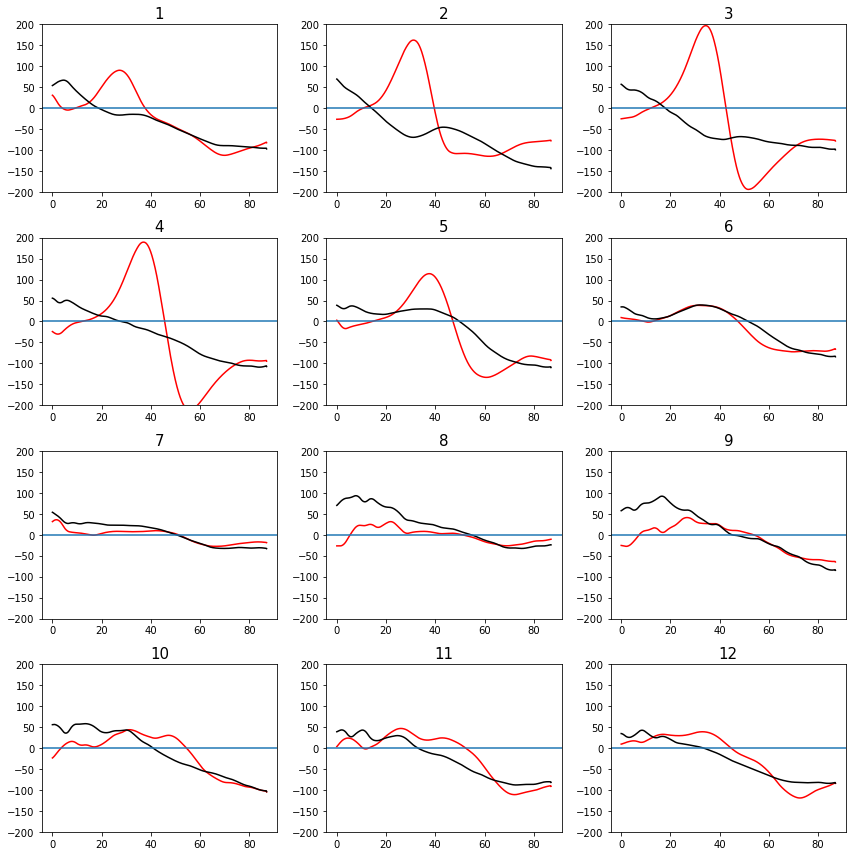

In [86]:
d=0
py.figure(figsize=(12,12))
for m in range(12):
    py.subplot(4,3,m+1)
    v=np.arange(-220,220,20)
    py.plot(lat_a,div_TE_a[d,:,m],'r-',label='TE')
    py.plot(lat_a,div_NE_a[d,:,m],'k-',label='INE')
    py.title(str(m+1),fontsize=15)
    py.axhline(0)
    py.ylim(-200,200)
    py.tight_layout()

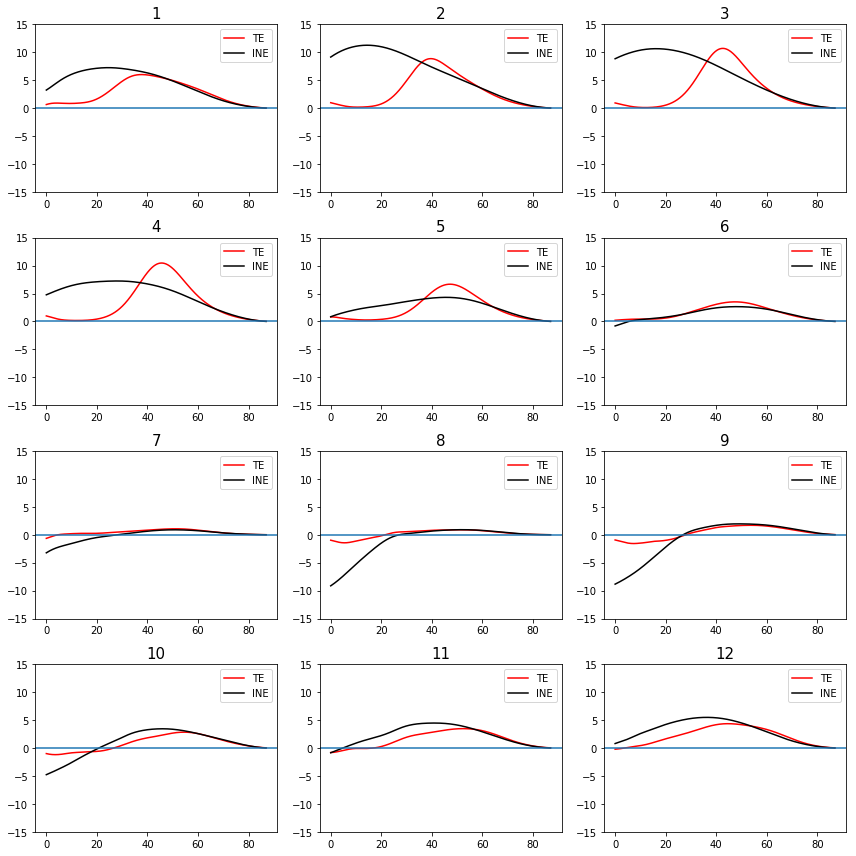

In [85]:
d=0
py.figure(figsize=(12,12))
for m in range(12):
    py.subplot(4,3,m+1)
    v=np.arange(-220,220,20)
    py.plot(lat_a,TE_a[d,:,m],'r-',label='TE')
    py.plot(lat_a[:-1],Ine_a[d,:,m],'k-',label='INE')
    py.title(str(m+1),fontsize=15)
    py.axhline(0)
    py.ylim(-15,15)
    py.legend(loc='best')
    py.tight_layout()

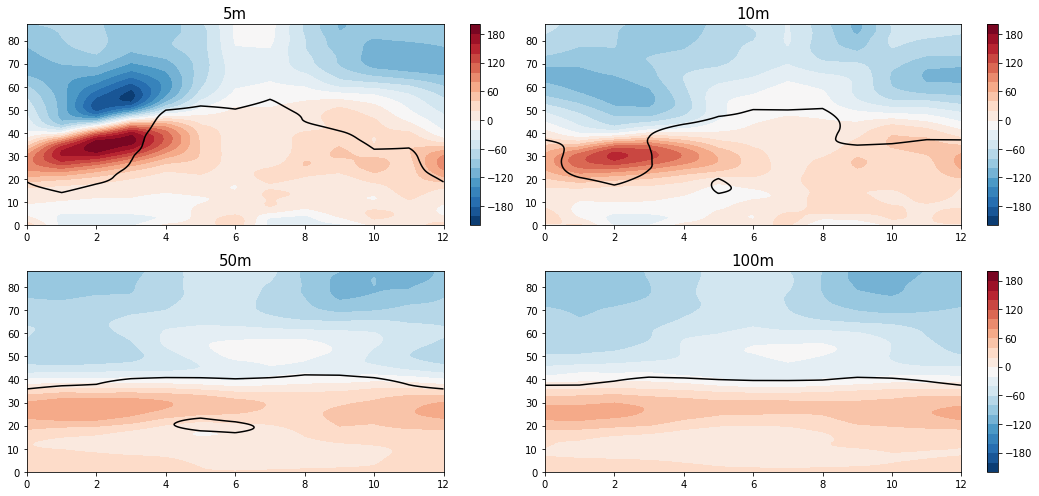

In [77]:
py.figure(figsize=(15,7))
depths=np.array([5,10,50,100])
for d in range(4):
    py.subplot(2,2,d+1)
    v=np.arange(-220,220,20)
    py.contourf(range(13),lat_a,div_TE_a[d,...],v,cmap=BuRd);py.colorbar()
    py.contour(range(13),lat_a,div_NE_a[d,...],levels=[0.00],colors='k')
    py.title(str(depths[d])+'m',fontsize=15)
    py.tight_layout()

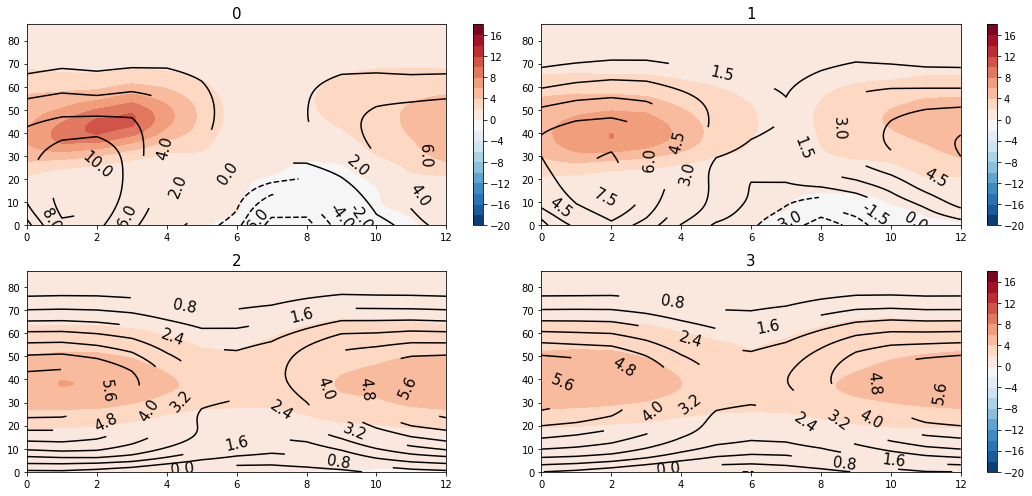

In [68]:
py.figure(figsize=(15,7))
for d in range(4):
    py.subplot(2,2,d+1)
    v=np.arange(-20,20,2)
    py.contourf(range(13),lat_a,TE_a[d,...],v,cmap=BuRd)
    py.colorbar()
    c=py.contour(range(13),lat_a[0:-1],Ine_a[d,...],10,colors='k')
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    py.title(str(d),fontsize=15)
    py.tight_layout()

In [51]:
Ine_a.shape

(4, 870, 13)

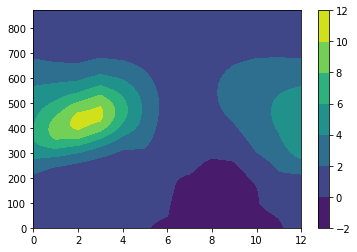

In [47]:
py.contourf(TE_a[0,...]);py.colorbar()

In [ ]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=storm_pos
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X[d,m])
        except ValueError as err:
            D[d,m]==np.nan        
  return D

Intensity_te=inerp_at_max(TE_a,lat_a)
Intensity_se=inerp_at_max(SE_a,lat_a)
Intensity_mm=inerp_at_max(MM_a,lat_a)
Intensity_ne=inerp_at_max(NE_a,lat_a)


I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)




## Shift decompose

In [1]:
import numpy as np
def calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=1):
    
    div_TE_a=spher_div(TE_a*10**15)
    div_SE_a=spher_div(SE_a*10**15)
    div_MM_a=spher_div(MM_a*10**15)
    div_NE_a=div_TE_a+div_SE_a+div_MM_a
    
    se=np.array(div_SE_a); te=np.array(div_TE_a); mm=np.array(div_MM_a); ne=np.array(div_NE_a)
    
    def diff(x):
        return x[:,:,1:]-x[:,:,:-1] 
    base_pos=te[...,:-1]
    
    if month_to_month==0 :
      def diff(x):
         return x[:,:,1:]-x[...,1:,None].mean(axis=2)    
      base_pos=te[...,1:,None].mean(axis=2)
        
    TE_change=base_pos+diff(te)
    NE_change=base_pos+diff(ne)
    SE_change=base_pos-diff(se)
    MM_change=base_pos-diff(mm)
    
    a = lambda x: np.append(x[:,:,-1,None],x,axis=-1)
    
    return a(SE_change), a(MM_change), a(TE_change), a(NE_change)

SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month=0)

NameError: global name 'spher_div' is not defined

In [ ]:
div_NE_a.shape

In [ ]:
def find_zero(div,lower_limit=30,specific_month=-1):
  depths=div.shape[0];
  months=div.shape[-1];
  zero_loc = np.zeros((depths,months))
  for d in range(0,depths):
      for m in range(0,months):
            l_range=((lat_a>=30) & (lat_a<=60))   
            if m==specific_month:
                l_range=((lat_a>=lower_limit) & (lat_a<=60))
            interpolation_function = interp1d(div[d,l_range,m],lat_a[l_range],kind='linear')
            try :
                zero_loc[d,m]=interpolation_function(0)
            except ValueError as err:
                zero_loc[d,m]=np.nan        
  return zero_loc

In [209]:
def threshold(I,value, pos1, pos2, pos3, pos4):
      for d in range(4):  
        for m in range(13):
            if (np.abs(I[d,m])<value) :
                #N[d,m]=np.nan
                pos1[d,m]=np.nan
                pos2[d,m]=np.nan
                pos3[d,m]=np.nan
                pos4[d,m]=np.nan                
      return pos1, pos2, pos3, pos4
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, 1.0, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))

In [45]:
def plot_flux(d,threshold_value) :
    
    n=d+1
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    pos=zero_div_TE
    
    if d==0:depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100

    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def add(y):
       y1 = y#np.append(y,y[:,0,np.newaxis],axis=1)
       return y1    
    
    def a(y):
       y1 = y#np.append(y,y[0])
       return y1 
    
    v = np.arange(-12.0, 13.0, threshold_value)
    latns=lat

    py.subplot(2,2,n)
    b = py.contourf(range(13),lat_a,add(TE_a[d,...]), v, cmap=BuRd); 
    # py.colorbar()
    c=py.contour(range(13),lat_a, add(TE_a[d,...]), v, colors='k',linewidths=1.0);
    
    py.plot(range(13), (pos[d,:]), 'ro-')
    #py.plot(range(13), (Intensity_te[d,:]*5), 'bo-')
    
    py.clabel(c,  inline=1,fmt = '%1.1f',inline_spacing=40, fontsize=15)
    
    py.xticks(range(13), (mticks),fontsize=15)
    py.yticks(range(-0,81,20),fontsize=15)
    py.tick_params(labelsize=18,size=4,width=2)
    py.title(str(depth)+' m',fontsize=30)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)
    py.ylim(0,60)
#     py.savefig(fig_dest+title+'_flux.pdf')
    #print fig_dest+title+'_flux.pdf'
    #py.show()

In [46]:
fig=py.figure(figsize=(20, 10))
for d in range(4):
    plot_flux(d,1.0)

NameError: global name 'threshold' is not defined

In [234]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()

[[ 37.88405995]]


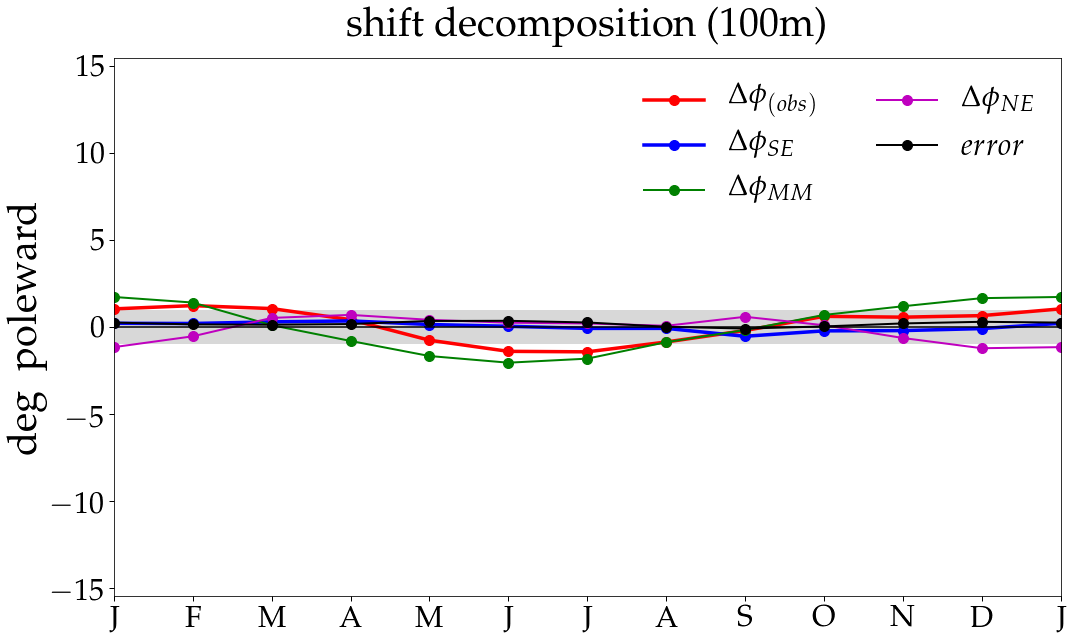

In [235]:
l=15.5
month_to_month=0; threshold_value=+0.0
plot_monthly_shift(3,l,month_to_month,threshold_value)

In [32]:
# plot_monthly_shift(0,10.5,month_to_month=0,threshold_value=1)

In [33]:
# plot_monthly_shift(2,16.5,month_to_month=1,threshold_value=+1)

In [34]:
# plot_monthly_shift(3,16.5,month_to_month=1,threshold_value=+1)

In [35]:
# plot_monthly_shift(3,16.5,month_to_month=0,threshold_value=1)

In [36]:
# plot_monthly_shift(0,16.5,month_to_month=0,threshold_value=1)

# Intensity decomposition

In [194]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="Intensity decomposition"+" "+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

/project2/tas1/pragallva/Spring_quarter_2018/figures/intensity/ISCA/Intensity_decomposition__100m.pdf


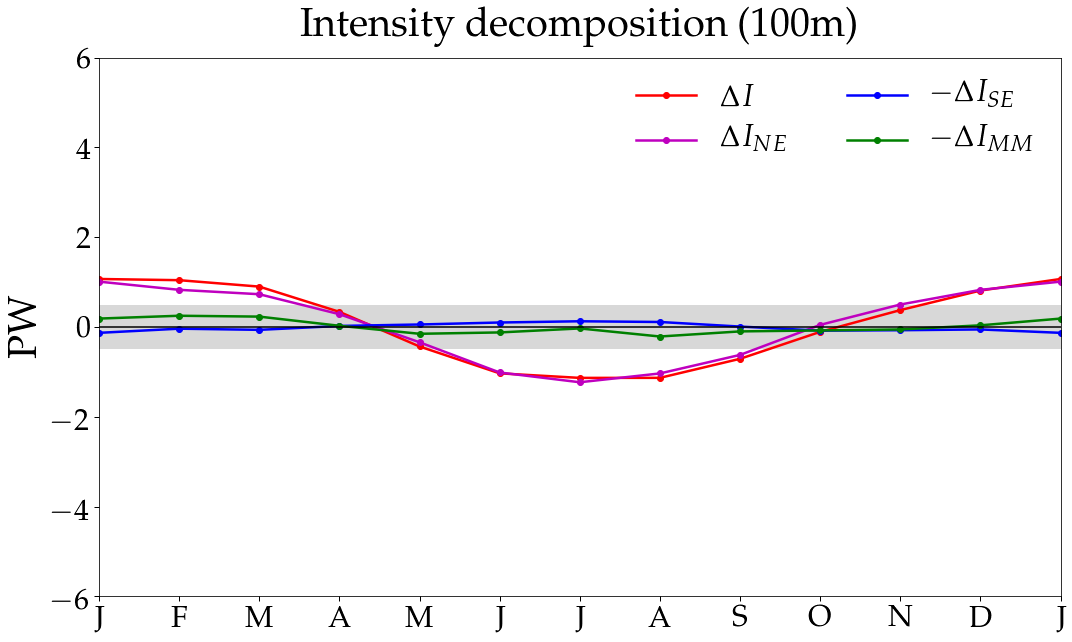

In [201]:
l=6
plot_intensity(3,l,0)

In [39]:
### radiation

def D(y,d):
    y1=np.append(y,y[:,0,np.newaxis],axis=1)
    x1=y1[d,1:]-y1[d,:-1]
    x2=np.append(x1[-1],x1)
    return x2

def plot_delta_NE(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    

    def D(y,d):
        if month_to_month==1 :
            y1=y
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            #mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            #mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
            
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(I_NE,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)
    py.plot(D(I_SWAB,d),'ro-',label=r'$\Delta I_{SWABS}$',lw=2.5)
    py.plot(D(I_SHF,d),'bo-',label=r'$\Delta I_{SHF}$',lw=2.5)
    py.plot(D(-I_OLR,d),'go-',label=r'$ - \Delta I_{OLR}$',lw=2.5) 
        #py.plot(D(-I_dhdt_N,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
        #py.plot(D(-I_dhdt_S,d),'ko-',label=r'$ - \Delta I_{\frac{dh}{dt}}$',lw=2.5) 
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="NE decomposition"+" "+" ("+str(depth)+"m)"
    title1="NE_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.3, 0.3, facecolor='0.5', alpha=0.3)
    py.legend(fontsize=25,ncol=2,frameon=False, loc='best')
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'    
    py.tight_layout()

In [40]:
I_NE.shape

(4, 13)

In [41]:
# plot_delta_NE(3,3.6,1)

In [42]:
def compare_plot(n,X,c,T,month_to_month=1,l=3):
    py.subplot(220+n)
    d=0
    
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    def D(y):
        if month_to_month==1 :
            x1=y[1:]-y[:-1]
            x2=np.append(x1[-1],x1)
        else :
            y1=y[:]-y[:-1,None].mean(axis=0)
            x2=y1
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    py.plot(range(13),D(X[d,:]),c+'o-',label='5m')
    py.plot(range(13),D(X[d+1,:]),c+'o--',label='10m')
    py.plot(range(13),D(X[d+2,:]),c+'o-.',label='50m')
    py.plot(range(13),D(X[d+3,:]),c+'o:',label='100m')
    py.tick_params(labelsize=18,size=4,width=2)
    py.ylabel('PW',fontsize=28)
    py.legend(loc='best',fontsize=20)
    py.axhline(0,color='k')
    py.ylim(-1*l,1*l)
    py.title(T,fontsize=30)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=18,size=5,width=1)
    py.subplots_adjust(left=0.12, right=0.88, top=0.88, bottom=0.10, wspace=0.15, hspace=0.3)


# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$')
# compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$')
# compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$')
# compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$')


In [43]:
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',l=4)
# compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',l=4)
# compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',l=4)
# compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',l=4)

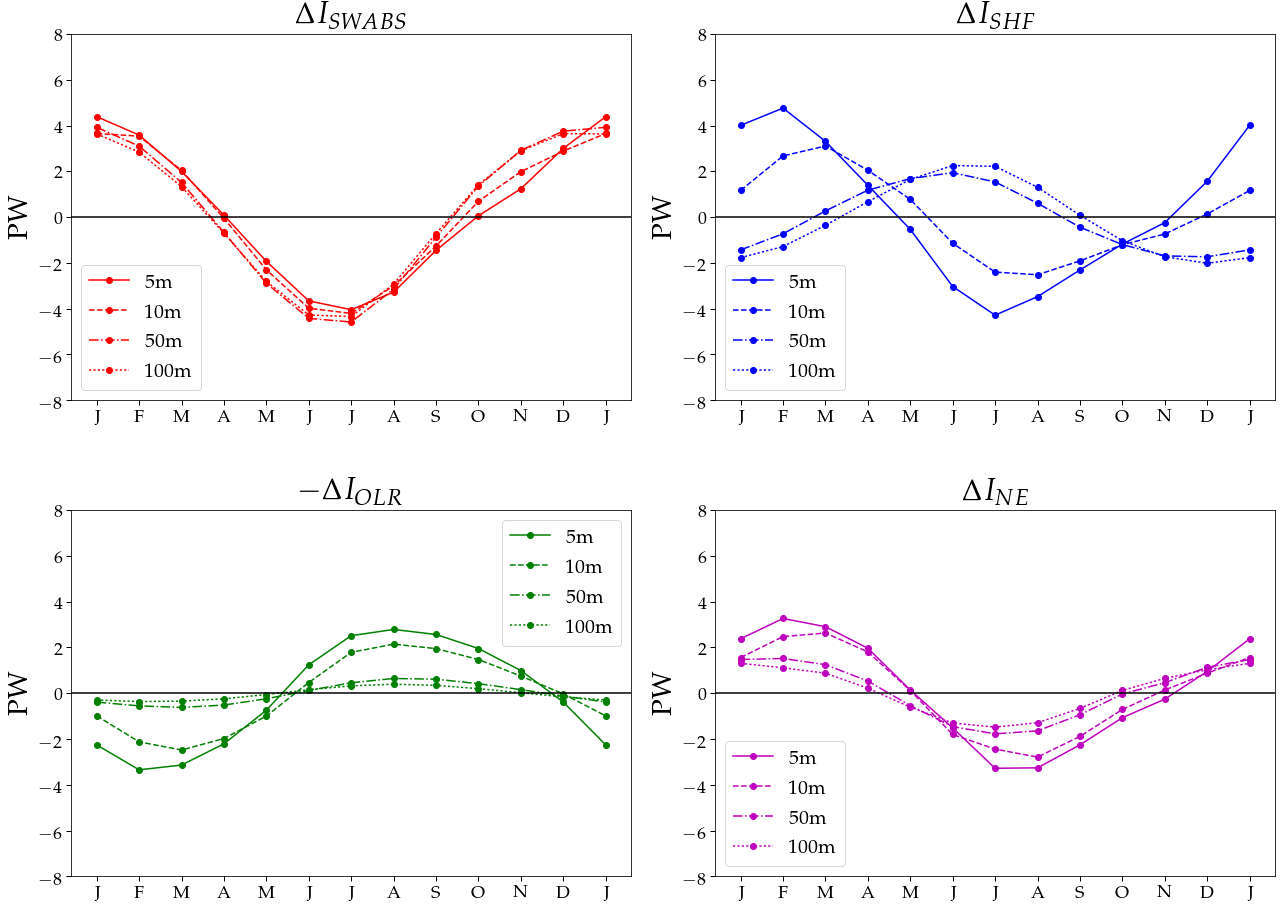

In [44]:
m_to_m=0; l=8
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_SWAB,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(2,I_SHF,'b',r'$\Delta I_{SHF}$',m_to_m,l)
compare_plot(3,-I_OLR,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
compare_plot(4,I_NE,'m',r'$\Delta I_{NE}$',m_to_m,l)

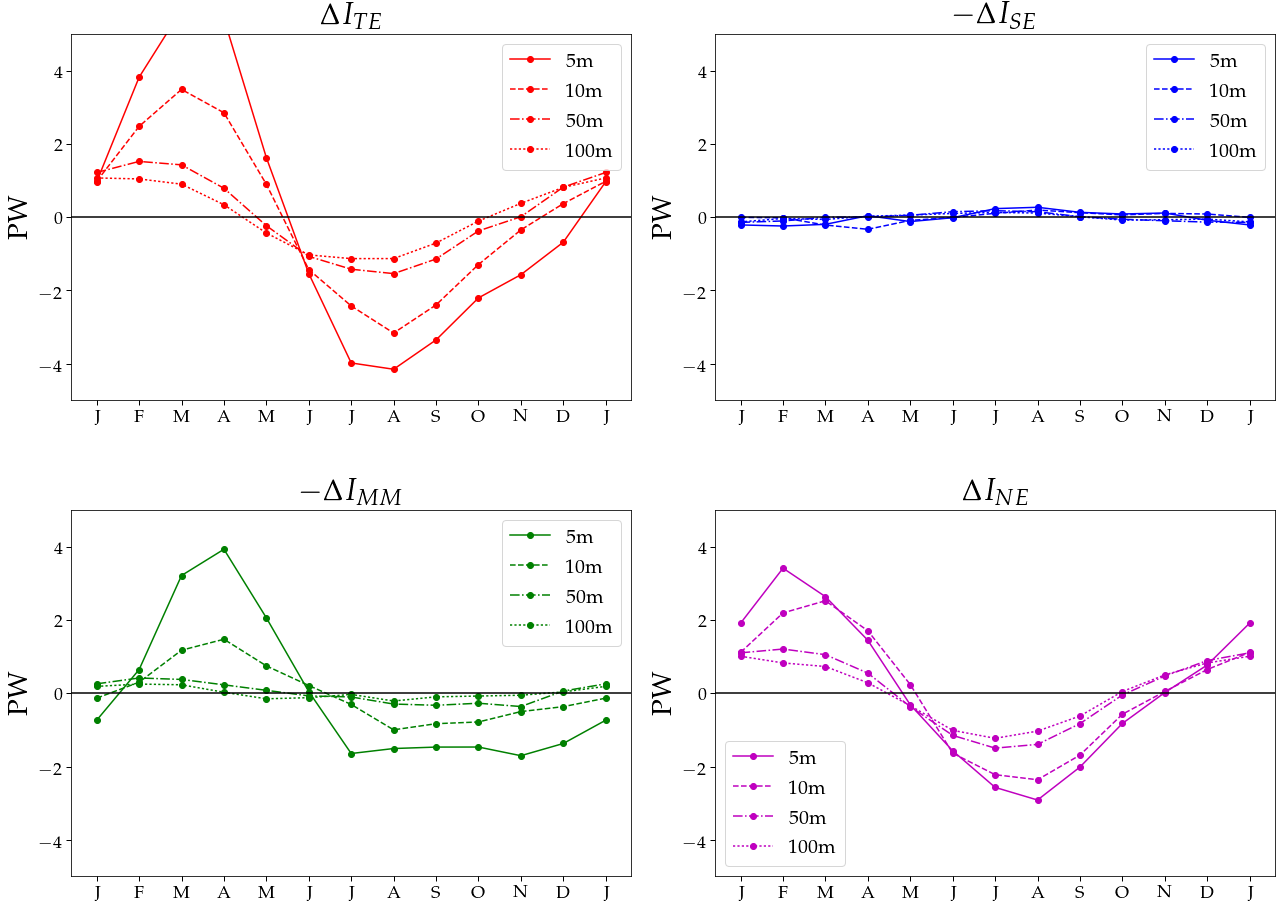

In [45]:
m_to_m=0; l=5
fig=py.figure(figsize=(22, 15))
compare_plot(1,Intensity_te,'r',r'$\Delta I_{TE}$',m_to_m,l)
compare_plot(2,-Intensity_se,'b',r'$ - \Delta I_{SE}$',m_to_m,l)
compare_plot(3,-Intensity_mm,'g',r'$ - \Delta I_{MM}$',m_to_m,l)
compare_plot(4,Intensity_ne,'m',r'$\Delta I_{NE}$',m_to_m,l)

In [46]:
# pick the storm track position and identify the index
from scipy.interpolate import interp1d
def inerp_at_max(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=40
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D


I_SWAB_at40 =inerp_at_max(Iswabs_a,latr_a)
I_SHF_at40  =inerp_at_max(Ishf_a,latr_a)
I_NE_at40   =inerp_at_max(Ine_a,latr_a)
I_OLR_at40  =inerp_at_max(Iolr_a,latr_a)
I_dhdt_at40 =inerp_at_max(Idhdt_a,latr_a)

In [47]:
# m_to_m=0; l=8
# fig=py.figure(figsize=(22, 15))
# compare_plot(1,I_SWAB_at40,'r',r'$\Delta I_{SWABS}$',m_to_m,l)
# compare_plot(2,I_SHF_at40,'b',r'$\Delta I_{SHF}$',m_to_m,l)
# compare_plot(3,-I_OLR_at40,'g',r'$ - \Delta I_{OLR}$',m_to_m,l)
# compare_plot(4,I_NE_at40,'m',r'$\Delta I_{NE}$',m_to_m,l)

# Decompose Net energy in Watts/m^2

In [48]:
swabs=np.array(swabs); shf=np.array(shf); ne=np.array(ne); olr=np.array(olr); dhdt=np.array(dhdt);
SW_sfc=np.array(SW_sfc); LW_sfc=np.array(LW_sfc); SW_toa=np.array(SW_toa); shflx=np.array(shflx); lhflx=np.array(lhflx);
sfc=np.array(sfc); toa=np.array(toa); 

In [49]:
#     swabs.append(div[depth]['SWABS'])
#     shf.append(div[depth]['SHF'])
#     dhdt.append(div[depth]['dhdt'])
#     olr.append(div[depth]['olr'])
#     ne.append(swabs[depth]+shf[depth]-olr[depth]-dhdt[depth])
    
#     SW_sfc.append(-1*div[depth]['SW_sfc_d'])
#     LW_sfc.append(-1*div[depth]['LW_sfc_d'])
#     SW_toa.append(div[depth]['SW_toa_d'])
#     shflx.append(div[depth]['shflx_u'])
#     lhflx.append(div[depth]['lhflx_u'])

In [50]:
SWABS_a, SHF_a  , NE_a , OLR_a, dhdt_a, lat_a = N_S_avg( swabs,shf, ne ,olr, dhdt, lat, flux_flag=1)
SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#

SW_toa_a, SW_sfc_a  , shflx_a , lhflx_a, LW_sfc_a, lat_a = N_S_avg( SW_toa, SW_sfc, shflx, lhflx, LW_sfc, lat,flux_flag=1)#
sfc_a, toa_a = N_S_avg( sfc, toa, shflx, lhflx, LW_sfc, lat,flux_flag=1)[0:2]


In [51]:
def inerp_at_mean(flux,lat):
  D = np.zeros((4,13))
  for d in range(0,4):
    for m in range(0,13):
        l_range=((lat>=30) & (lat<=60)) 
        X=np.nanmean(zero_div_TE[d,:-1])
        interpolation_function = interp1d(lat[l_range],flux[d,l_range,m],kind='cubic')
        try :
            D[d,m]=interpolation_function(X)
        except ValueError as err:
            D[d,m]==np.nan        
  return D

In [52]:
P_div_TE =inerp_at_mean(div_TE_a,lat_a)
P_div_SE =inerp_at_mean(div_SE_a,lat_a)
P_div_NE =inerp_at_mean(div_NE_a,lat_a)
P_div_MM =inerp_at_mean(div_MM_a,lat_a)

In [53]:
P_SWAB =inerp_at_max(SWABS_a,lat_a)
P_SHF  =inerp_at_max(SHF_a,lat_a)
P_NE   =inerp_at_max(NE_a,lat_a)
P_OLR  =inerp_at_max(OLR_a,lat_a)
P_dhdt =inerp_at_max(dhdt_a,lat_a)

P_SWsfc = inerp_at_max(SW_sfc_a,lat_a)
P_LWsfc = inerp_at_max(LW_sfc_a,lat_a)
P_SWtoa = inerp_at_max(SW_toa_a,lat_a)
P_shflx = inerp_at_max(shflx_a,lat_a)
P_lhflx = inerp_at_max(lhflx_a,lat_a)

P_sfc = inerp_at_max(sfc_a,lat_a)
P_toa = inerp_at_max(toa_a,lat_a)

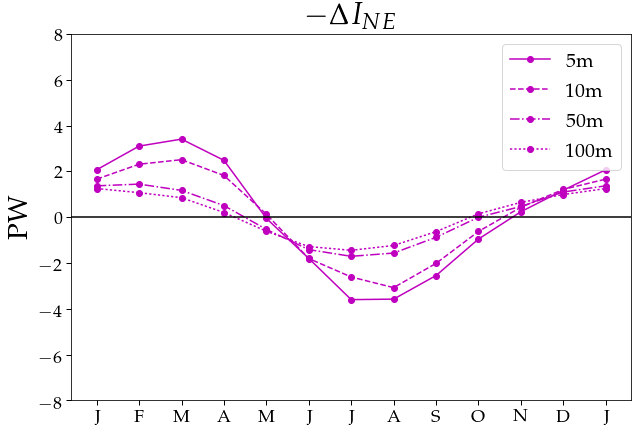

In [205]:
def D(y):
        y1=y[:]-y[:-1,None].mean(axis=0)
        x2=y1
        return x2
 
m_to_m=0; l=8
d=0; c1='k'
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_NE,'m',r'$-\Delta I_{NE}$',m_to_m,l)
# py.plot(range(13),D(-I_dhdt[d,:]),c1+'o-',label='5m')
# py.plot(range(13),D(-I_dhdt[d+1,:]),c1+'o--',label='10m')
# py.plot(range(13),D(-I_dhdt[d+2,:]),c1+'o-.',label='50m')
# py.plot(range(13),D(-I_dhdt[d+3,:]),c1+'o:',label='100m')


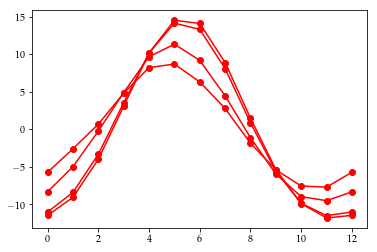

In [174]:
for d in range(4):
    py.plot(I_SFC[d,:],'ro-')
#     py.plot(I_dhdt[d,:],'ko-')
#     py.plot(I_TOA[d,:],'ro-')

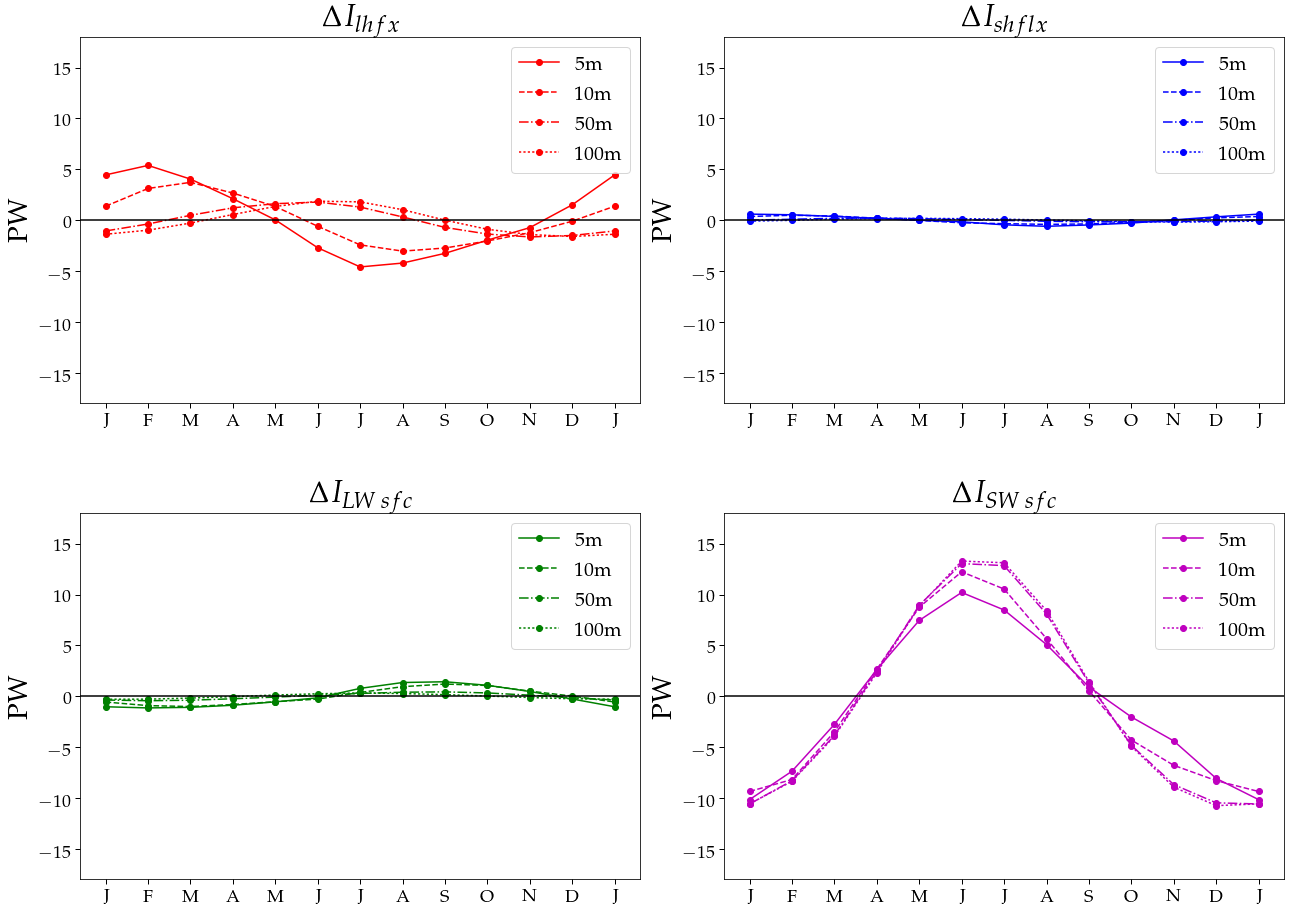

In [55]:
m_to_m=0; l=18
fig=py.figure(figsize=(22, 15))
compare_plot(1,I_lhflx,'r',r'$\Delta I_{lhfx}$',m_to_m,l)
compare_plot(2,I_shflx,'b',r'$\Delta I_{shflx}$',m_to_m,l)
compare_plot(3,I_LWsfc,'g',r'$ \Delta I_{LW\:sfc}$',m_to_m,l)
compare_plot(4,I_SWsfc,'m',r'$\Delta I_{SW\:sfc}$',m_to_m,l)

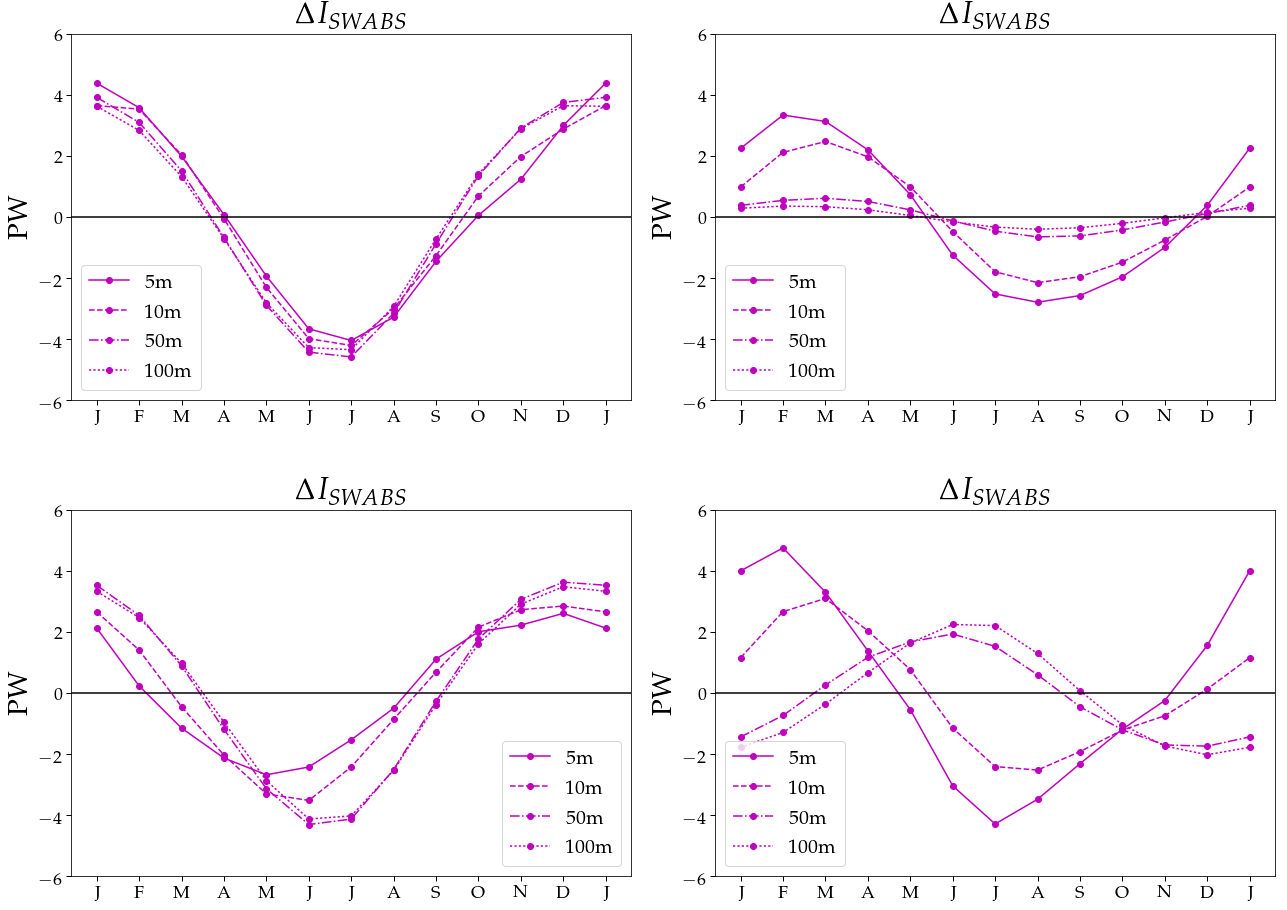

In [56]:
fig=py.figure(figsize=(22, 15))
l=6
compare_plot(1,I_SWAB,'m',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(2,I_OLR,'m',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(3,I_SWAB-I_OLR,'m',r'$\Delta I_{SWABS}$',m_to_m,l)
compare_plot(4,I_SHF,'m',r'$\Delta I_{SWABS}$',m_to_m,l)

In [57]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

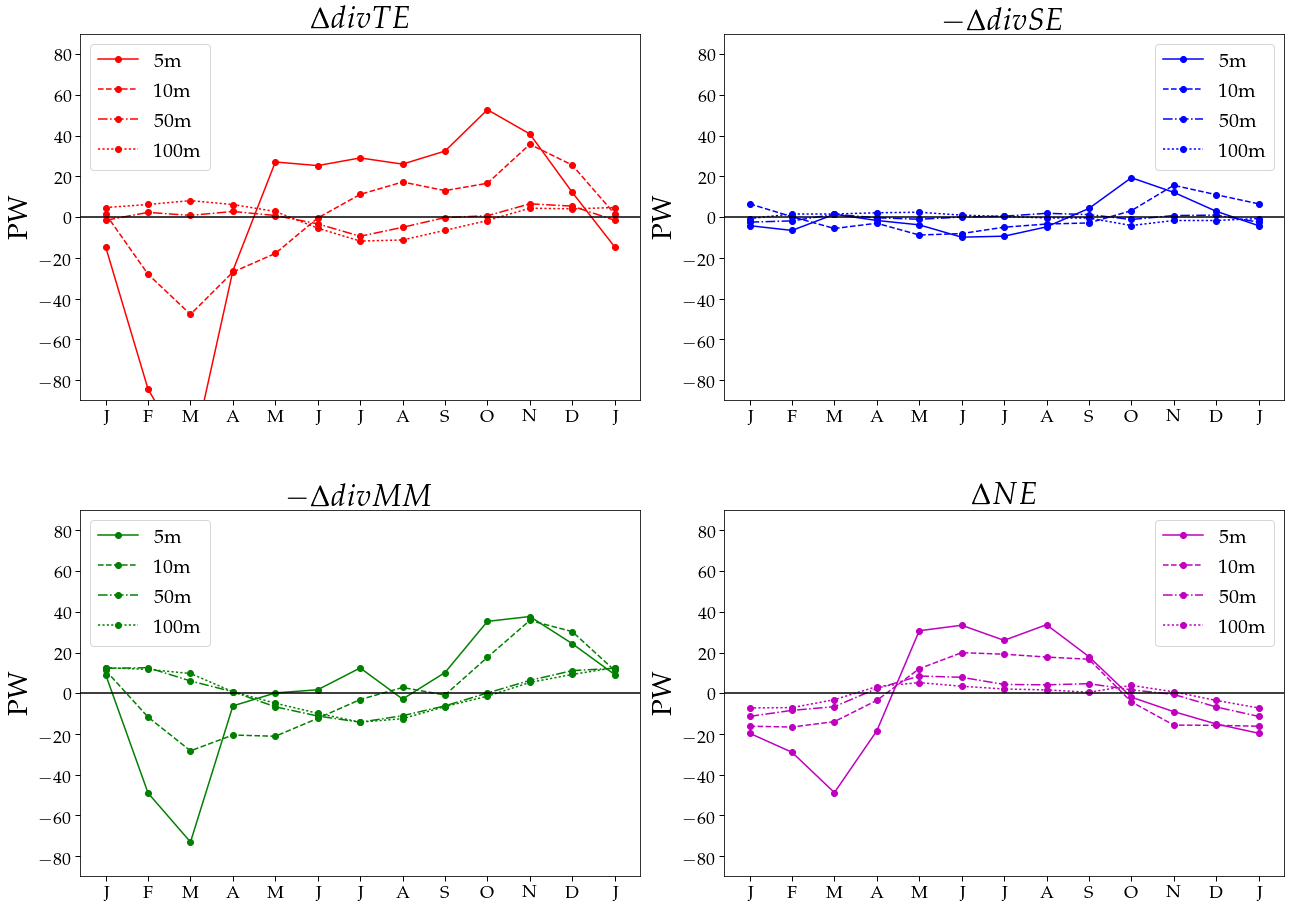

In [58]:
m_to_m=0; l=90
fig=py.figure(figsize=(22, 15))
compare_plot(1,P_div_TE,'r',r'$\Delta {divTE}$',m_to_m,l)
compare_plot(2,-P_div_SE,'b',r'$-\Delta {divSE}$',m_to_m,l)
compare_plot(3,-P_div_MM,'g',r'$-\Delta {divMM}$',m_to_m,l)
compare_plot(4,P_div_NE,'m',r'$\Delta {NE}$',m_to_m,l)

# Predict intensity

In [ ]:
### radiation

def plot_intensity(d,l,month_to_month=1):
    
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
     
    py.rc('text', usetex=True)
    py.rc('font', family='serif', serif='Palatino',weight='bold')
    
    mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
    def D(y,d):
        if month_to_month==1 :
            y1=y#np.append(y,y[:,0,np.newaxis],axis=1)
            x1=y1[d,1:]-y1[d,:-1]
            x2=np.append(x1[-1],x1)
            mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
        else :
            y1=y[d,:]-y[d,:-1,None].mean(axis=0)
            x2=y1
            mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        return x2
    
    if month_to_month==1 :
        mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    else :
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        
    
    fig=py.figure(figsize=(15, 9))           
    py.plot(D(Intensity_te,d),'ro-',label=r'$\Delta I$',lw=2.5)
    py.plot(D(Intensity_ne,d),'mo-',label=r'$\Delta I_{NE}$',lw=2.5)   
    py.plot(-D(Intensity_se,d),'bo-',label=r'$ - \Delta I_{SE}$',lw=2.5)
    py.plot(-D(Intensity_mm,d),'go-',label=r'$ - \Delta I_{MM}$',lw=2.5)
                                              
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,l)
    py.ylabel("PW", fontsize=40)
    title="Intensity decomposition"+" "+" ("+str(depth)+"m)"
    title1="Intensity_decomposition_"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    py.xticks(range(13), mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-0.5, 0.5, facecolor='0.5', alpha=0.3)
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    #py.savefig(fig_dest+title1+'.pdf')
    print fig_dest+title1+'.pdf'

    
    py.tight_layout()

In [167]:
def predict_intensity(X,month_to_month=1):
    
    proxy=np.array(X); te=np.array(Intensity_te);
    
    def diff(x):
        return x[:,1:]-x[:,:-1] 
    base_pos=te[:,:-1]
    a = lambda x: np.append(x[:,-1,None],x,axis=-1)
    
    if month_to_month==0 :
      def diff(x):
         return x[:,1:]-x[:,1:,None].mean(axis=1) 
      a = lambda x: np.append(x[:,-1,None],x,axis=-1)
      base_pos=te[...,1:,None].mean(axis=1)
        
    TE_ch=base_pos+diff(te)
    predict=base_pos+diff(proxy)
        
    return a(TE_ch), a(predict)

orig, predict = predict_intensity(Intensity_ne-Intensity_mm-Intensity_se,month_to_month=0)

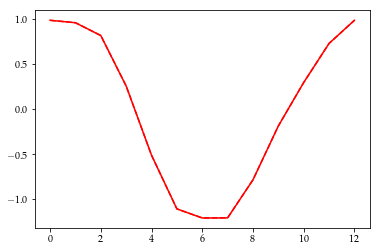

In [171]:
d=d+1
py.plot(orig[d,:]-orig[d,:].mean(axis=-1),'r-')
py.plot(predict[d,:]-predict[d,:].mean(axis=-1),'r--')



In [154]:
I_SWAB =inerp_at_max(Iswabs_a,latr_a)
I_SHF  =inerp_at_max(Ishf_a,latr_a)
I_NE   =inerp_at_max(Ine_a,latr_a)
I_OLR  =inerp_at_max(Iolr_a,latr_a)
I_dhdt =inerp_at_max(Idhdt_a,latr_a)

I_SWsfc = inerp_at_max(ISW_sfc_a,latr_a)
I_LWsfc = inerp_at_max(ILW_sfc_a,latr_a)
I_SWtoa = inerp_at_max(ISW_toa_a,latr_a)
I_shflx = inerp_at_max(Ishflx_a,latr_a)
I_lhflx = inerp_at_max(Ilhflx_a,latr_a)

I_SFC = inerp_at_max(ISFC_a,latr_a)
I_TOA = inerp_at_max(ITOA_a,latr_a)

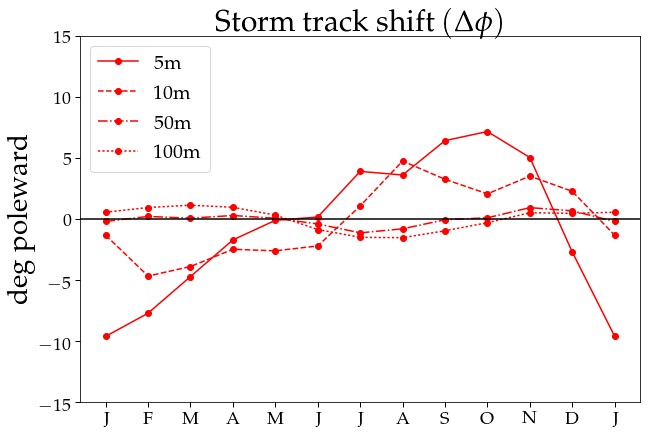

In [249]:
m_to_m=0; l=15
fig=py.figure(figsize=(22, 15))
compare_plot(1,storm,'r','Storm  track  shift'+ r'$  \:(\Delta {\phi})$',m_to_m,l)
py.ylabel('deg poleward')

In [227]:
zero_div_TE[0,...]

array([ 37.68413558,  39.58302221,  42.58411097,  45.5856909 ,
        47.18814051,  47.45744411,  51.19830389,          nan,
        53.71653673,  54.46225918,  52.33380493,  44.59569256,  37.68413558])

In [240]:
py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

def plot_monthly_shift(d,l,month_to_month=1,threshold_value=+1) :
        
    if d==0: depth=5
    if d==1:depth=10
    if d==2:depth=50
    if d==3:depth=100
            
    I=Intensity_te
    
    n=d+1    
#     month_to_month=1
#     threshold_value=0
    SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
    if d==0:
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
    else :
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
    if ((d==0) & (month_to_month==0)):
        zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))
    
    m=range(0,13)
    #title="Storm track shift decomposition \n (Method 2)"
    fig=py.figure(figsize=(15, 9))
    
    print zero_div_TE[0,...]
    
    mticks = ['J-D','F-J','M-F','A-M','M-A','J-M','J-J','A-J','S-A','O-S','N-O','D-N','J-D']
    base_pos=zero_div_TE[d,:-1]
    def add_month_to_end(y1) :
        y=np.append(y1[-1],y1)
        return y
        
    if month_to_month==0:
        s=TE_change[d,:,1:].mean(axis=-1)[None,:,None]
        base_pos=find_zero(s)
        mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
        #base_pos=44 #np.nanmean(zero_div_TE[d,:-1])
        print base_pos
        
    TE_obs_pos         = add_month_to_end(zero_div_TE[d,1:]-base_pos)
    SE_pos             = add_month_to_end(zero_div_SE[d,1:]-base_pos)
    MM_pos             = add_month_to_end(zero_div_MM[d,1:]-base_pos)
    NE_pos             = add_month_to_end(zero_div_NE[d,1:]-base_pos)
    TE_calc_pos        = SE_pos+MM_pos+NE_pos
    nonlinear_error= TE_obs_pos-TE_calc_pos
        
#     py.subplot(220+n)
    
    fig=py.plot(TE_obs_pos,'r.-',label=r'$\Delta\phi_{ ({obs})}$',linewidth=3.5,markersize=20)
    fig=py.plot(SE_pos,'b.-',label=r'$\Delta\phi_{{{SE}}}$',linewidth=3.5,markersize=20)
    fig=py.plot(MM_pos,'g.-',label=r'$\Delta\phi_{{{MM}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(NE_pos,'m.-',label=r'$\Delta\phi_{{{NE}}}$',linewidth=2.0,markersize=20)
    fig=py.plot(nonlinear_error,'k.-',label=r'${error}$',linewidth=2.0,markersize=20)
    py.axhline(0, color='k',linewidth=1.5)
    py.xlim(0,12)
    py.ylim(-1*l,+1*l)
    py.ylabel("deg \\ poleward", fontsize=40)

    title="shift decomposition"+" "+" ("+str(depth)+"m)"
    title1="shift_decomp"+"_"+str(depth)+"m"
    py.title(title,fontsize=40,y=1.03)
    #py.title(title, fontsize=35)
    py.xticks(m, mticks,size=37)
    py.tick_params(labelsize=30,size=5,width=1)
    py.axhspan(-1.0, 1.0, facecolor='0.5', alpha=0.3)
    py.tight_layout()
    py.legend(loc='best',fontsize=30,ncol=2,frameon=False)
    
    make_sure_path_exists("/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/")
    fig_dest1="/project2/tas1/pragallva/Spring_quarter_2018/figures/position/ISCA/"
    #py.savefig(fig_dest1+title1+'.pdf')
    py.show()
    return zero_div_TE

[ 37.68413558  39.58302221  42.58411097  45.5856909   47.18814051
  47.45744411  51.19830389  50.89964394  53.71653673  54.46225918
  52.33380493  44.59569256  37.68413558]
[[ 37.88405995]]


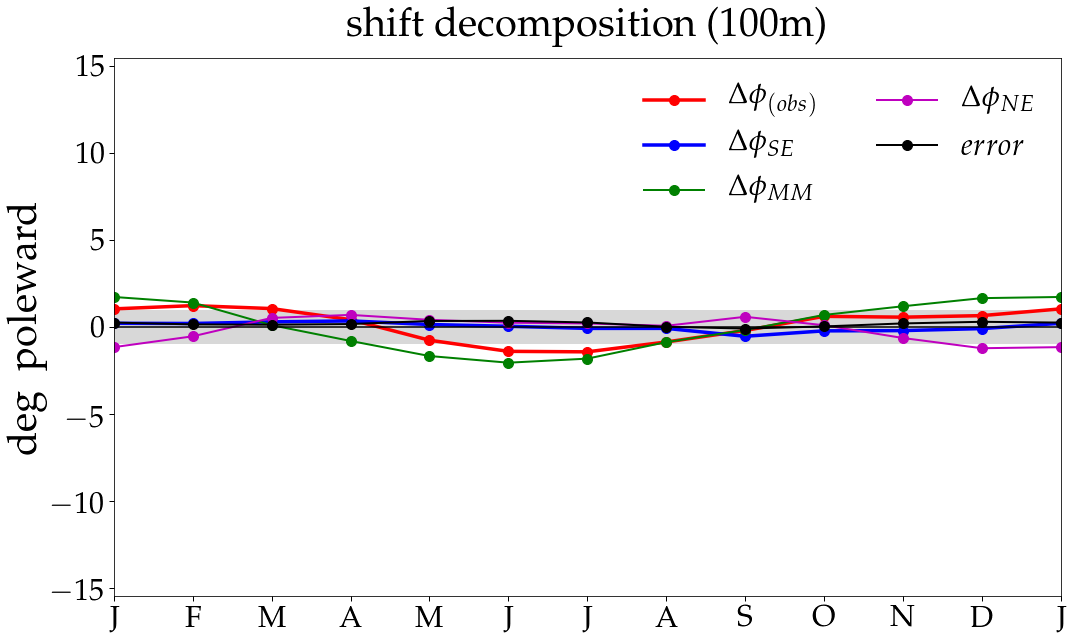

In [241]:
l=15.5
month_to_month=0; threshold_value=+0.0
storm=plot_monthly_shift(3,l,month_to_month,threshold_value)

# Compare seasonality and intensity

In [93]:
def seasonality(d):
    def M(X):
        l=(X-np.nanmean(X[1:]))/np.nanmax(np.abs(X))
        return l

    fig, ax1 = py.subplots()

    ax1.plot(range(13), M(Intensity_te[d,:]), 'bo-')
    ax1.set_xlabel("Months", color='k',fontsize=20)
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel("Intensity (PW)", color='b',fontsize=20)
    ax1.tick_params(labelsize=18)

    ax2 = ax1.twinx()
    ax2.plot(range(13), M(zero_div_TE[d,:]), 'ro-')
    ax2.set_ylabel("Storm track position (deg)", color='r',fontsize=20)
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    py.show()

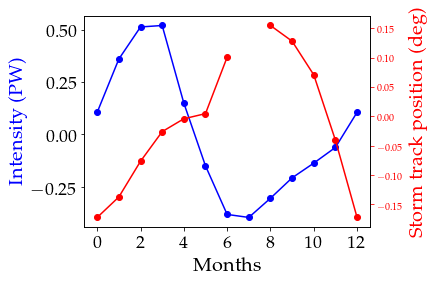

In [94]:
seasonality(0)

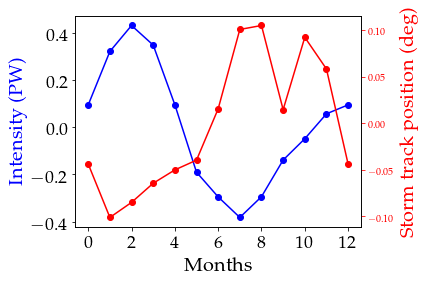

In [95]:
seasonality(1)

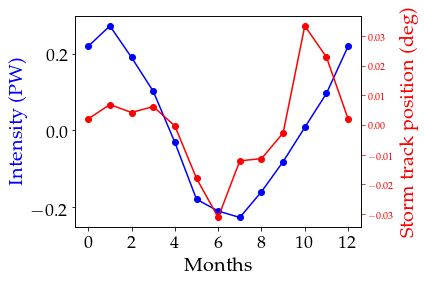

In [96]:
seasonality(2)

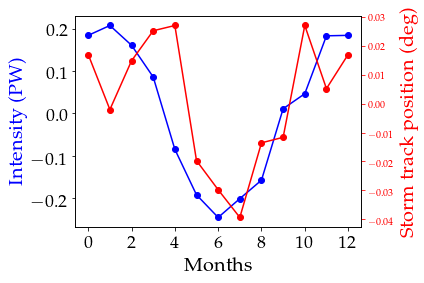

In [97]:
seasonality(3)

In [232]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
#zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))


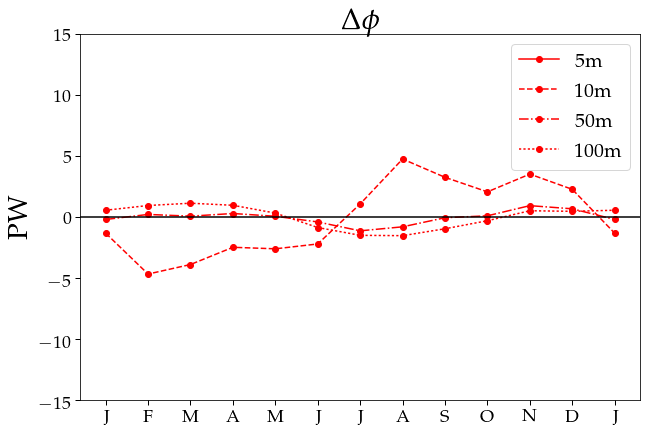

In [236]:
m_to_m=0; l=15
fig=py.figure(figsize=(22, 15))
compare_plot(1,zero_div_TE,'r',r'$\Delta {\phi}$',m_to_m,l)

In [ ]:


if d==0:
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change,47,7), find_zero(SE_change,50,8), find_zero(MM_change,37,7), find_zero(NE_change))
else :
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(I, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change), find_zero(NE_change))
    
if ((d==0) & (month_to_month==0)):
    zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))


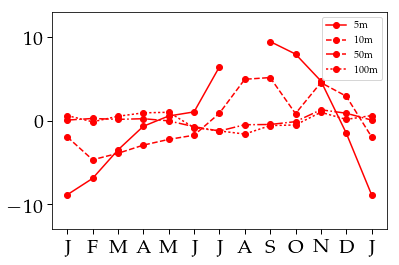

In [115]:
m=0
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-',label='5m')
m=1
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro--',label='10m')
m=2
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro-.',label='50m')
m=3
py.plot(zero_div_TE[m,:]-np.nanmean(zero_div_TE[m,:]),'ro:', label='100m')
py.xticks(range(13),mticks,size=20)
py.tick_params(labelsize=20,size=5,width=1)
mticks = ['J','F','M','A','M','J','J','A','S','O','N','D','J']
py.ylim(-13,13)
py.legend(loc='best')

In [125]:
month_to_month=0
threshold_value=1
SE_change, MM_change, TE_change, NE_change = calculate_shift_just_by_adding_individual_flux_divergences(month_to_month)
zero_div_TE, zero_div_SE, zero_div_MM, zero_div_NE = threshold(Intensity_te, threshold_value, find_zero(TE_change), find_zero(SE_change), find_zero(MM_change,38,8), find_zero(NE_change))


11


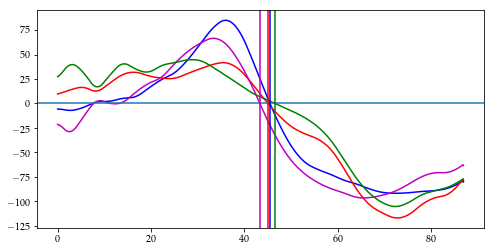

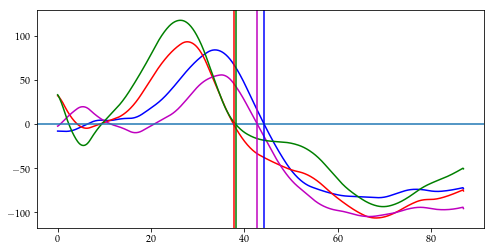

In [137]:
py.figure(1,figsize=(8,4))
m=m+1
d=0
py.plot(lat_a, SE_change[d,:,m],'b-')
py.plot(lat_a,TE_change[d,:,m],'r-')
py.plot(lat_a,NE_change[d,:,m],'m-')
py.plot(lat_a,MM_change[d,:,m],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m],color='b')
py.axvline(zero_div_TE[d,m],color='r')
py.axvline(zero_div_MM[d,m],color='g')
py.axvline(zero_div_NE[d,m],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
py.figure(2,figsize=(8,4))
py.plot(lat_a, SE_change[d,:,m+1],'b-')
py.plot(lat_a,TE_change[d,:,m+1],'r-')
py.plot(lat_a,NE_change[d,:,m+1],'m-')
py.plot(lat_a,MM_change[d,:,m+1],'g-')
py.axhline(0)
py.axvline(zero_div_SE[d,m+1],color='b')
py.axvline(zero_div_TE[d,m+1],color='r')
py.axvline(zero_div_MM[d,m+1],color='g')
py.axvline(zero_div_NE[d,m+1],color='m')
#py.axvline(base_pos,color='k',linewidth=5)
print m